In [3]:
import pandas as pd

In [45]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 826.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
train_raw_data = pd.read_json('/Users/doruktarhan/Documents/GitHub/machine-generated-text-detector/data/followupqg/raw_data/train.json')

In [10]:

train_raw_data.columns

Index(['id', 'question', 'answer', 'follow-up', 'relation'], dtype='object')

In [11]:
train_raw_data.head()

,id,question,answer,follow-up,relation
0,0,ELI5: Why are PS4 and PS5 unable to read PS1 o...,PS1 and some PS2 disks are based on the CD sta...,"[As far as I know, a lot of PS2 games were on ...",Strongly Related
1,1,ELI5: Why are PS4 and PS5 unable to read PS1 o...,The disc producers aren’t able to recreate the...,[You mention recreate the data but don't expla...,Strongly Related
2,2,ELI5: Why aren’t there insects the size of man...,They don’t breath the same way mammals do. The...,"[One example of insect is roach, which is harm...",Slightly Related
3,3,ELI5: What is it that you see when you press y...,The light sensing cells in your retina fire of...,[] So the black spot and light circle around i...,Related
4,4,ELI5: Why do words stop sounding like words wh...,"When you say or think of a word (for example, ...",Side question: why would repeating the same ph...,Slightly Related


### Human

In [12]:
train_human = pd.read_json('/Users/doruktarhan/Documents/GitHub/machine-generated-text-detector/data/followupqg/human_qa/train.json')

In [13]:
train_human.columns

Index(['Question', 'Answer'], dtype='object')

In [14]:
train_human.head()

,Question,Answer
0,Why are PS4 and PS5 unable to read PS1 or PS2 ...,PS1 and some PS2 disks are based on the CD sta...
1,Why are PS4 and PS5 unable to read PS1 or PS2 ...,The disc producers aren’t able to recreate the...
2,Why aren’t there insects the size of man or la...,They don’t breath the same way mammals do. The...
3,What is it that you see when you press your fi...,The light sensing cells in your retina fire of...
4,Why do words stop sounding like words when tho...,"When you say or think of a word (for example, ..."


In [24]:
for index, row in train_human[:5].iterrows():
    q, a = row['Question'], row['Answer']
    print(q)
    print(a)
    


Why are PS4 and PS5 unable to read PS1 or PS2 discs?
PS1 and some PS2 disks are based on the CD standard. The drive in a PS4 (and I assume PS5) doesn't read CDs. Among other things it's only equipped with lasers for DVD (650nm) and Blu-ray (450nm).
Why are PS4 and PS5 unable to read PS1 or PS2 discs?
The disc producers aren’t able to recreate the same data they used for those discs as they do with current models, the PS4 and PS5.
Why aren’t there insects the size of man or larger?
They don’t breath the same way mammals do. They have tubes in various parts of their body that expose their circulatory system to air where it absorbs oxygen. Because they don’t inhale, they air limited in size by the amount of oxygen in the atmosphere. Which is why they used to be bigger in past eras when there was more oxygen in the atmosphere.
What is it that you see when you press your finger between your eye socket and eyeball, on the eyelid?
The light sensing cells in your retina fire off not only from 

In [25]:
len(train_human['Answer'])

2790

In [33]:
import numpy as np
lenghts_human = [len(x) for x in train_human['Answer']]
mean_length = np.mean(lenghts_human)
print(mean_length)

615.6336917562724


615.6336917562724
count    2790.000000
mean      615.633692
std       566.864942
min       121.000000
25%       263.000000
50%       436.000000
75%       765.000000
max      6679.000000
dtype: float64


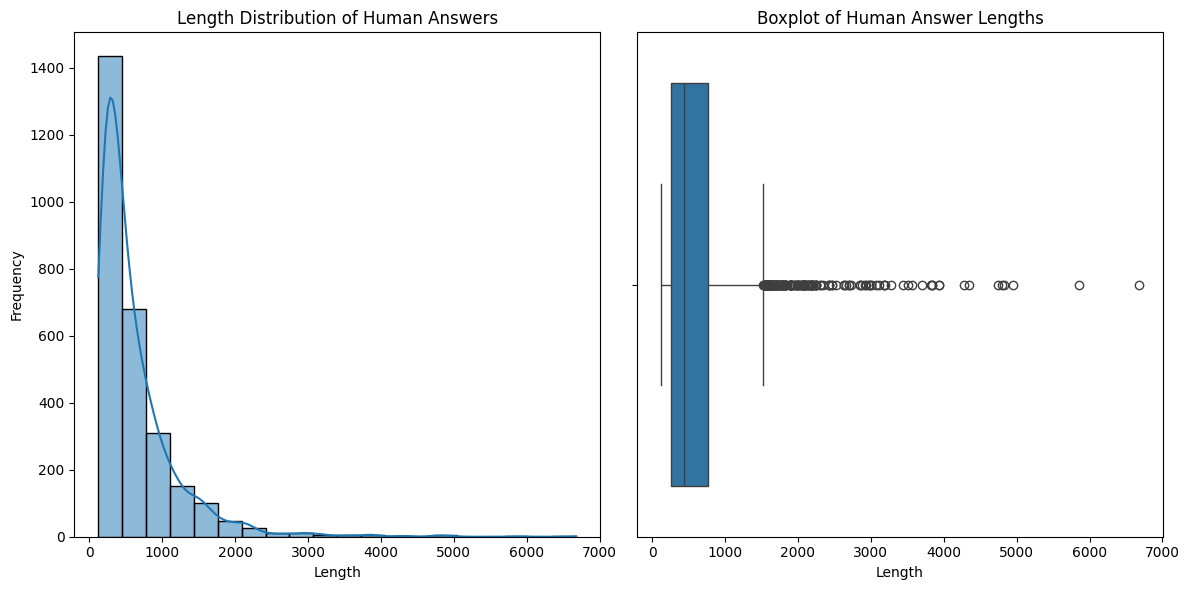

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
lenghts_human = [len(x) for x in train_human['Answer']]
mean_length = np.mean(lenghts_human)
print(mean_length)

# Convert lengths to a pandas Series for easier statistical analysis
lengths_series = pd.Series(lenghts_human)

# Calculate detailed statistics
detailed_stats = lengths_series.describe(percentiles=[.25, .5, .75])
print(detailed_stats)

# Visualize length distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(lengths_series, bins=20, kde=True)
plt.title('Length Distribution of Human Answers')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=lengths_series)
plt.title('Boxplot of Human Answer Lengths')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

### Mistral answers

In [35]:
mistral_train = pd.read_json('/Users/doruktarhan/Documents/GitHub/machine-generated-text-detector/data/followupqg/mistral7b_qa/train.json')

In [36]:
mistral_train.head()

,Question,Answer
0,Why are PS4 and PS5 unable to read PS1 or PS2 ...,The PlayStation 4 (PS4) and PlayStation 5 (PS5...
1,Why are PS4 and PS5 unable to read PS1 or PS2 ...,The PlayStation 4 (PS4) and PlayStation 5 (PS5...
2,Why aren’t there insects the size of man or la...,There are no insects the size of a man or larg...
3,What is it that you see when you press your fi...,When you press your finger between your eye so...
4,Why do words stop sounding like words when tho...,"When we think about words too much, we may sta..."


In [37]:
mistral_train.columns

Index(['Question', 'Answer'], dtype='object')

count    2784.000000
mean     1230.754310
std       270.707942
min       284.000000
25%      1141.000000
50%      1313.000000
75%      1408.000000
max      1753.000000
dtype: float64


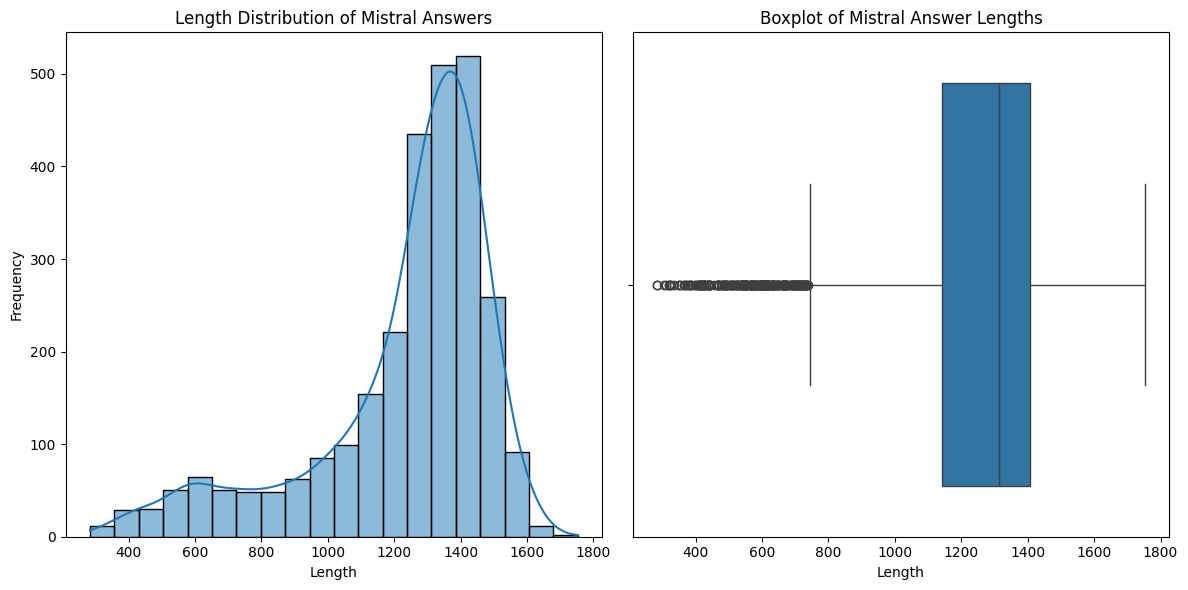

In [50]:
lengths_mistral = [len(x) for x in mistral_train['Answer']]
mean_length_mistral = np.mean(lengths_mistral)


# Convert lengths to a pandas Series for easier statistical analysis
lengths_series = pd.Series(lengths_mistral)

# Calculate detailed statistics
detailed_stats = lengths_series.describe(percentiles=[.25, .5, .75])
print(detailed_stats)

# Visualize length distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(lengths_series, bins=20, kde=True)
plt.title('Length Distribution of Mistral Answers')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=lengths_series)
plt.title('Boxplot of Mistral Answer Lengths')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

### Llama asnwers

In [39]:
# Step 2: Read the text file
file_path = 'data/followupqg/llama3_qa/train.txt'
llama_train = pd.read_csv(file_path, delimiter='\t', header=None, names=['question', 'answer'])


In [40]:
llama_train.head()

,question,answer
0,Question: Why are PS4 and PS5 unable to read P...,NaN
1,1. **Different disc formats**: PS1 and PS2 use...,NaN
2,2. **Laser technology**: The lasers used in PS...,NaN
3,3. **Disc encryption**: PS1 and PS2 games were...,NaN
4,4. **Hardware and software differences**: The ...,NaN


### Openai Answers

In [69]:
openai_train = pd.read_json('/Users/doruktarhan/Documents/GitHub/machine-generated-text-detector/data/followupqg/openai_qa/train.json')

In [70]:
openai_train.head()

,Question,Answer
0,Why are PS4 and PS5 unable to read PS1 or PS2 ...,PS4 and PS5 are unable to read PS1 or PS2 disc...
1,Why are PS4 and PS5 unable to read PS1 or PS2 ...,PS4 and PS5 are unable to read PS1 or PS2 disc...
2,Why aren’t there insects the size of man or la...,Insects' respiratory systems cannot support la...
3,What is it that you see when you press your fi...,You may see flashes of light or colors when yo...
4,Why do words stop sounding like words when tho...,###Answer###: This phenomenon is known as sema...


In [71]:
openai_train['Answer'][0]

'PS4 and PS5 are unable to read PS1 or PS2 discs because they lack the necessary hardware and software compatibility.'

count    2784.000000
mean      144.661279
std        59.290898
min         2.000000
25%       106.000000
50%       138.000000
75%       175.000000
max       479.000000
dtype: float64


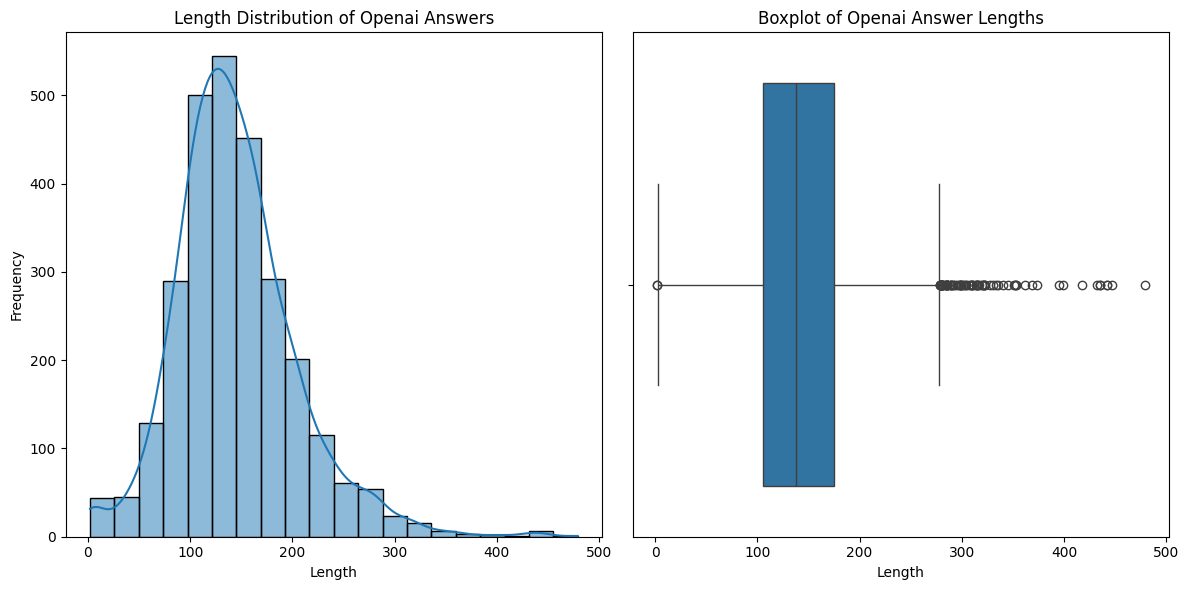

In [73]:
lengths_openai = [len(x) for x in openai_train['Answer']]
mean_length_openai= np.mean(lengths_openai)


# Convert lengths to a pandas Series for easier statistical analysis
lengths_series = pd.Series(lengths_openai)

# Calculate detailed statistics
detailed_stats = lengths_series.describe(percentiles=[.25, .5, .75])
print(detailed_stats)

# Visualize length distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(lengths_series, bins=20, kde=True)
plt.title('Length Distribution of Openai Answers')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=lengths_series)
plt.title('Boxplot of Openai Answer Lengths')
plt.xlabel('Length')

plt.tight_layout()
plt.show()